## **Historical Home Values Across North America** (long-term, smooth seasonally adjusted, all data)

In [119]:
# Step 1: Import essential libraries 

# Import pandas for data manipulation, numpy for numerical operations,
# matplotlib for plotting, seaborn for styling, datetime for date management,
# and os for file management, and sklearn for statistical analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set visualization style for all plots
plt.style.use('dark_background')

# Print message to confirm all dependencies are imported successfully.
print("Dependencies imported successfully.")

Dependencies imported successfully.


In [120]:
# Ensure 'output' directory exists to save results
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory '{output_dir}' is ready.")

Output directory 'output' is ready.


In [121]:
# Step 2: Load Zillow Research Data from CSV

# Read in the Zillow data CSV file containing home values.
zillow_data = pd.read_csv('Zillow_Home_Value_Index_Smooth.csv')

# Confirm data was successfully loaded
print("Zillow data loaded successfully.")

Zillow data loaded successfully.


In [122]:
# Display the first few rows of the data to understand the structure and contents
print(zillow_data.head())

   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  122086.021122   
1    394913         1     New York, NY        msa        NY  217122.541025   
2    753899         2  Los Angeles, CA        msa        CA  221698.801779   
3    394463         3      Chicago, IL        msa        IL  152707.070761   
4    394514         4       Dallas, TX        msa        TX  125949.506035   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  122300.809571  122567.178873  123138.488742  123795.997905  ...   
1  218045.189320  218976.383000  220863.341724  222817.352828  ...   
2  222523.802610  223622.695850  225809.124252  228200.391475  ...   
3  152848.433024  153117.659942  153787.429609  154593.081957  ...   
4  126005.604384  126070.095181  126237.571004  126458.383292  ...   

      2023-12-31     2024-01-31     2024-02-29     2024-03-31     2024-04-30  \
0  352438.988641  352871.12524

In [123]:
# Step 3: Data Cleaning and Preprocessing

# Melt the dataframe to transform date columns into rows for easier time-series analysis
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
zillow_melted = pd.melt(zillow_data, id_vars=id_vars, var_name='Date', value_name='Value')

# Convert 'Date' column from string to datetime format for easy date filtering and manipulation
zillow_melted['Date'] = pd.to_datetime(zillow_melted['Date'])

# Remove any rows containing missing data to ensure clean analysis.
zillow_melted.dropna(inplace=True)

print("Data cleaning completed.")

Data cleaning completed.


In [124]:
zillow_melted

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Value
1,394913,1,"New York, NY",msa,NY,2000-01-31,217122.541025
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,221698.801779
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,152707.070761
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,125949.506035
5,394692,5,"Houston, TX",msa,TX,2000-01-31,121810.328018
...,...,...,...,...,...,...,...
265810,753929,935,"Zapata, TX",msa,TX,2024-09-30,119439.176654
265811,394743,936,"Ketchikan, AK",msa,AK,2024-09-30,389885.013270
265812,753874,937,"Craig, CO",msa,CO,2024-09-30,289940.677141
265813,395188,938,"Vernon, TX",msa,TX,2024-09-30,87762.111311


In [125]:
# Step 4: Exploratory Data Analysis (Full Data)

## 4.1 Overall Average Home Value (U.S)

# First, calculate the overall average home value across the entire U.S.
overall_avg_value = zillow_melted['Value'].mean()
print(f"Overall average home value in the U.S.: ${overall_avg_value:,.2f}")

Overall average home value in the U.S.: $178,606.68


In [126]:
# Calculate additional central tendency measures
median_value = zillow_melted['Value'].median()
mode_value = zillow_melted['Value'].mode()[0]
print(f"Median home value in the U.S.: ${median_value:,.2f}")
print(f"Mode home value in the U.S.: ${mode_value:,.2f}")

Median home value in the U.S.: $145,276.87
Mode home value in the U.S.: $27,195.44


In [127]:
# Calculate measures of dispersion
range_value = zillow_melted['Value'].max() - zillow_melted['Value'].min()
print(f"Range of home values in the U.S.: ${range_value:,.2f}")

Range of home values in the U.S.: $1,538,289.50


In [128]:
# Find the most recent date in the data to focus on current home values
latest_date = zillow_melted['Date'].max()
print (latest_date)

# Filter the data for the latest date to get the most recent values
latest_values = zillow_melted[zillow_melted['Date'] == latest_date]

2024-09-30 00:00:00


In [129]:
# Calculate central tendency measures for the latest values
latest_avg_value = latest_values['Value'].mean()
latest_median_value = latest_values['Value'].median()
latest_mode_value = latest_values['Value'].mode()[0]

print(f"Current (latest date) average home value in the U.S.: ${latest_avg_value:,.2f}")
print(f"Current (latest date) median home value in the U.S.: ${latest_median_value:,.2f}")
print(f"Current (latest date) mode home value in the U.S.: ${latest_mode_value:,.2f}")

Current (latest date) average home value in the U.S.: $284,457.50
Current (latest date) median home value in the U.S.: $235,134.44
Current (latest date) mode home value in the U.S.: $46,609.69


In [130]:
# Calculate measures of dispersion for the latest values
latest_range_value = latest_values['Value'].max() - latest_values['Value'].min()

print(f"Current (latest date) range of home values in the U.S.: ${latest_range_value:,.2f}")

Current (latest date) range of home values in the U.S.: $1,518,875.25


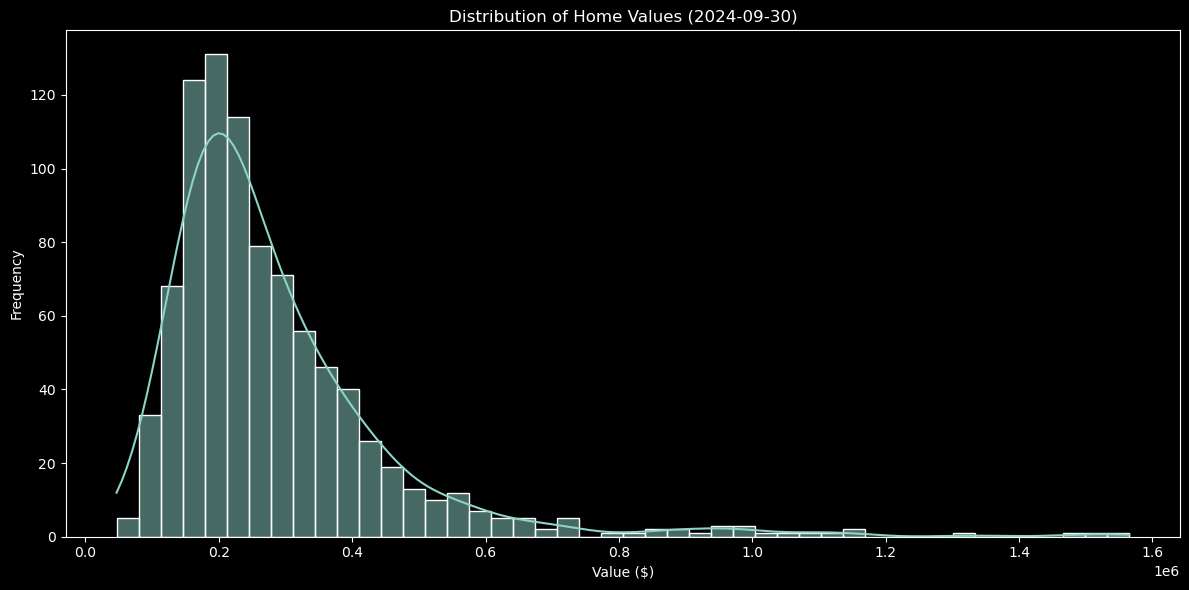

Results saved as 'home_value_distribution.png'


In [131]:
## 4.2 Distribution (latest date) 

# Plot a distribution of home values for the latest date
plt.figure(figsize=(12, 6)) 
sns.histplot(latest_values['Value'], kde=True) 

# Augment or and incorporate the other graph properties
plt.title(f'Distribution of Home Values ({latest_date.date()})') 
plt.xlabel('Value ($)') 
plt.ylabel('Frequency') 
plt.tight_layout()

# Save figure to file
plt.savefig(os.path.join(output_dir, 'home_value_distribution.png'))

# Display the plot
plt.show()

print("Results saved as 'home_value_distribution.png'")

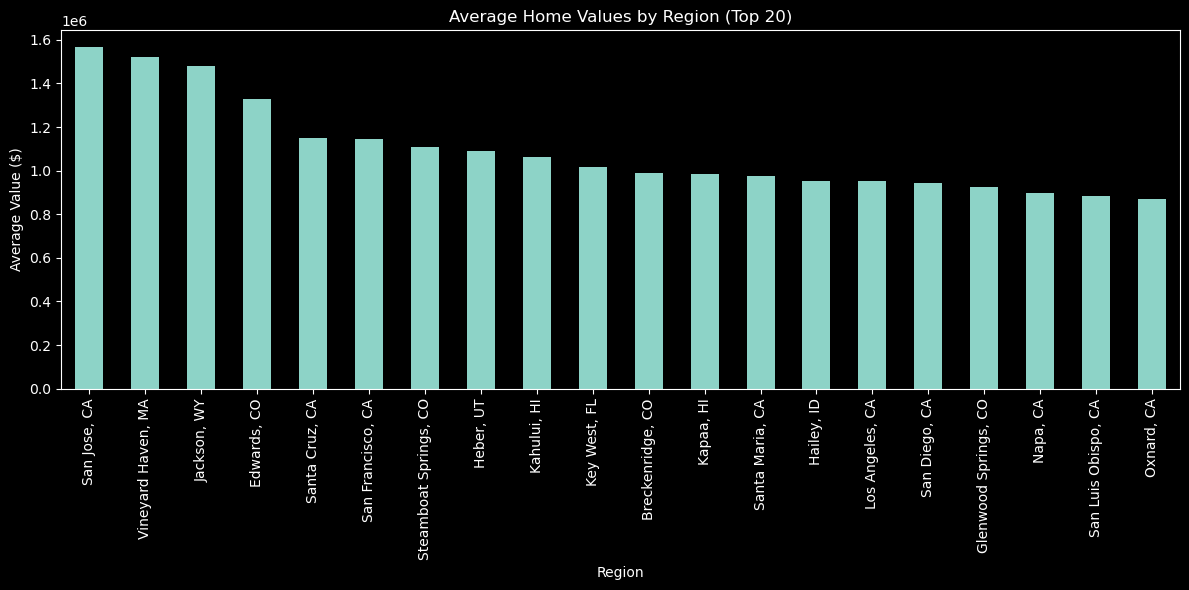

Results saved as 'average_home_values_top_20.png'


In [132]:
## 4.3 Average Home Values by Region (latest date) 

# Calculate the average home value for each region, sort by value in descending order
avg_values = latest_values.groupby('RegionName')['Value'].mean().sort_values(ascending=False) 

# Plot the top 20 regions with the highest average home values
plt.figure(figsize=(12, 6)) 
avg_values.head(20).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Average Home Values by Region (Top 20)') 
plt.xlabel('Region') 
plt.ylabel('Average Value ($)') 
plt.xticks(rotation=90) 
plt.tight_layout()

# Save figure to the output folder
plt.savefig(os.path.join(output_dir, 'average_home_values_top_20.png'))

# Display the plot
plt.show()

print("Results saved as 'average_home_values_top_20.png'")

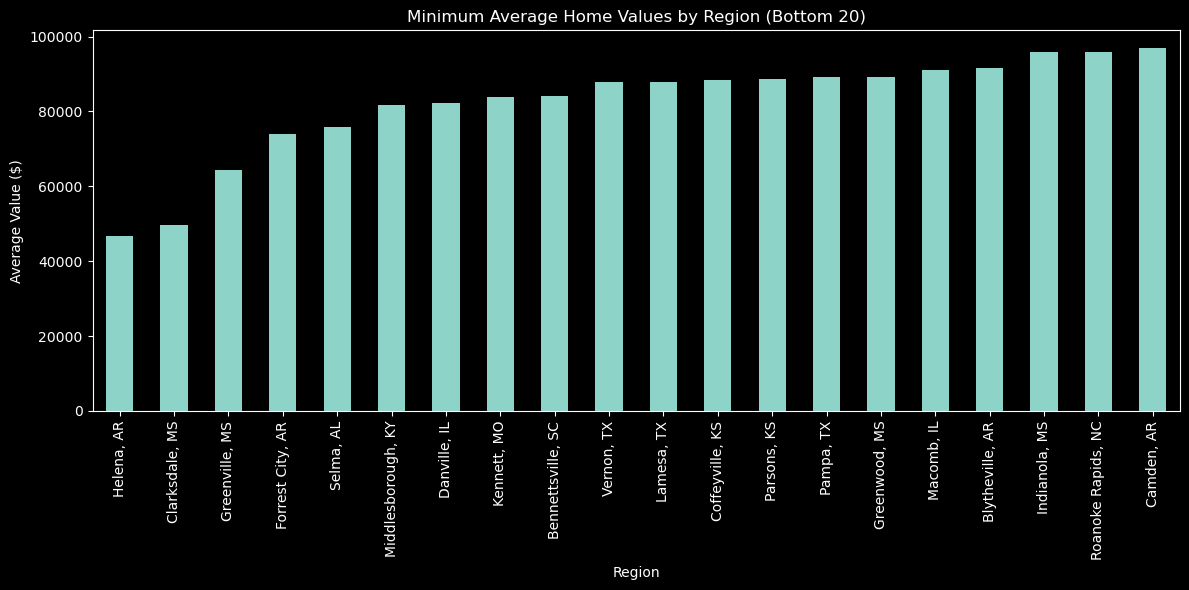

Results saved as 'minimum_home_values_bottom_20.png'


In [133]:
## 4.4 Minimum Average Home Values by Region (latest date) 

# Sort regions by value in ascending order for the lowest values
min_avg_values = avg_values.sort_values(ascending=True)

# Plot the bottom 20 regions with the lowest average home values
plt.figure(figsize=(12, 6)) 
min_avg_values.head(20).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Minimum Average Home Values by Region (Bottom 20)') 
plt.xlabel('Region') 
plt.ylabel('Average Value ($)') 
plt.xticks(rotation=90) 
plt.tight_layout() 

# Save figure to file
plt.savefig(os.path.join(output_dir, 'minimum_home_values_bottom_20.png'))

# Display the plot
plt.show()

print("Results saved as 'minimum_home_values_bottom_20.png'")

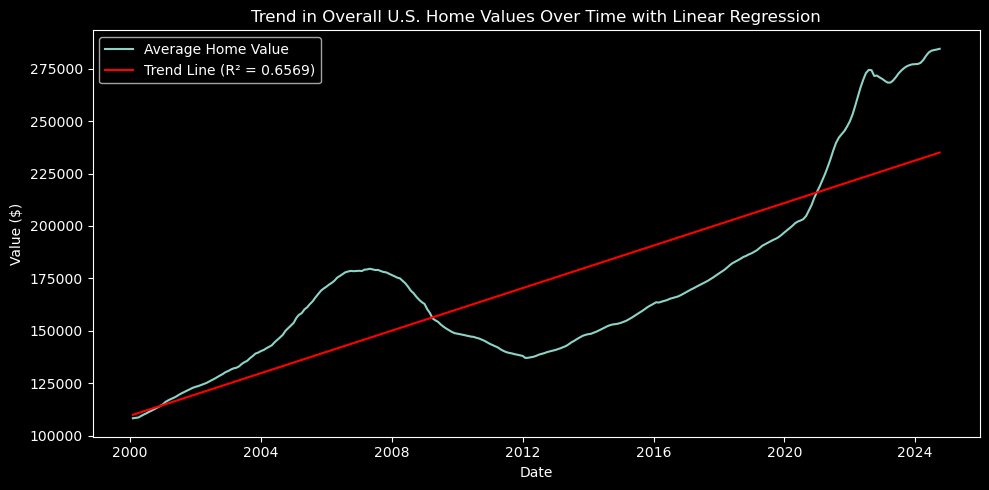

R-squared value for Overall U.S.: 0.6569


In [134]:
## Step 4.5: Trends Over Time Overall U.S with Linear Regression and R-squared Value

# Function to calculate and plot trend with linear regression
def calculate_trend_with_r2(data, region_name):
    avg_values_over_time = data.groupby('Date')['Value'].mean().reset_index()
    X = avg_values_over_time['Date'].map(datetime.toordinal).values.reshape(-1, 1)
    y = avg_values_over_time['Value'].values

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(avg_values_over_time['Date'], y, label='Average Home Value')
    plt.plot(avg_values_over_time['Date'], y_pred, color='red', label=f'Trend Line (R² = {r_squared:.4f})')
    plt.title(f"Trend in {region_name} Home Values Over Time with Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Value ($)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{region_name.lower().replace(" ", "_")}_home_value_trend_with_regression.png')
    plt.show()

    print(f"R-squared value for {region_name}: {r_squared:.4f}")

# Overall U.S.
calculate_trend_with_r2(zillow_melted, 'Overall U.S.')

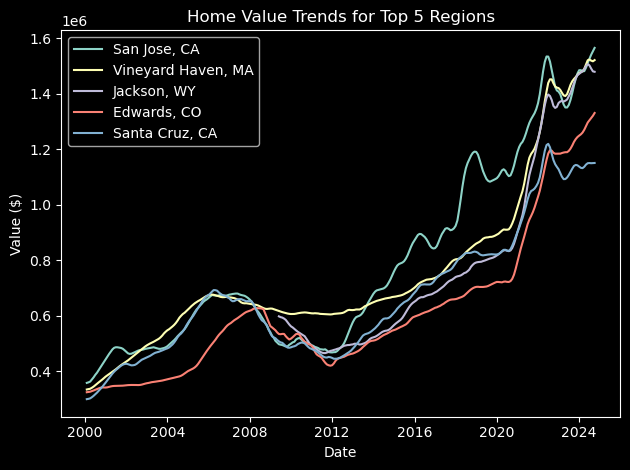

Results saved as 'home_value_trends_top_5.png'


In [135]:
## 4.6 Trends Over Time (for top 5 regions) 

# Identify the top 5 regions by average value
top_5_regions = avg_values.head().index.tolist() 

# Plot home value trends over time for each of these top 5 regions
for region in top_5_regions: 
    # Filter data for each region and plot its value trend
    region_data = zillow_melted[zillow_melted['RegionName'] == region] 
    plt.plot(region_data['Date'], region_data['Value'], label=region) 

# Augment or and incorporate the other graph properties
plt.title('Home Value Trends for Top 5 Regions') 
plt.xlabel('Date') 
plt.ylabel('Value ($)') 
plt.legend() 
plt.tight_layout()

# Save figure to file
plt.savefig(os.path.join(output_dir, 'home_value_trends_top_5.png'))

# Display the plot
plt.show()

print("Results saved as 'home_value_trends_top_5.png'")

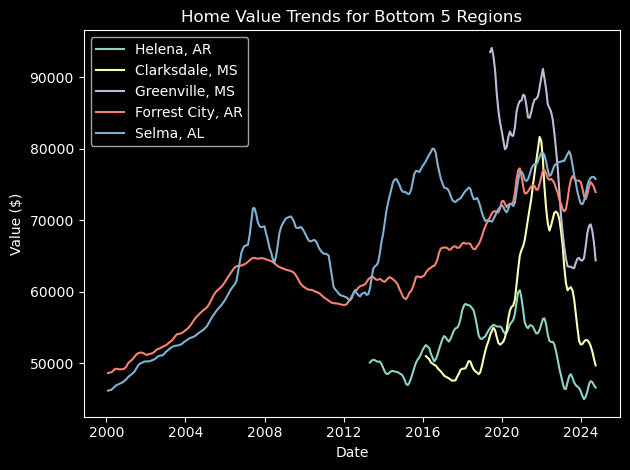

Results saved as 'home_value_trends_bottom_5.png'


In [136]:
## 4.7 Trends Over Time (for bottom 5 regions) 

# Identify the bottom 5 regions by average value
bottom_5_regions = min_avg_values.head().index.tolist() 

# Plot home value trends over time for each of these bottom 5 regions
for region in bottom_5_regions: 
    region_data = zillow_melted[zillow_melted['RegionName'] == region] 
    plt.plot(region_data['Date'], region_data['Value'], label=region) 

# Augment or and incorporate the other graph properties
plt.title('Home Value Trends for Bottom 5 Regions') 
plt.xlabel('Date') 
plt.ylabel('Value ($)') 
plt.legend() 
plt.tight_layout() 

# Save figure to file
plt.savefig(os.path.join(output_dir, 'home_value_trends_bottom_5.png'))

# Display the plot
plt.show()

print("Results saved as 'home_value_trends_bottom_5.png'")

In [137]:
# Step 5: Conclusions (Full Data)

# Print out insights and findings based on the analysis
print("\nConclusions:")

# (a) Variation in Home Values Across Regions
print("a. Is there a significant variation in home values across regions?")
print(f"   i. The currernt average home value overall in the U.S. is ${latest_avg_value.mean():,.2f}.")
print(f"   ii. The region with the highest average home value currently is {avg_values.index[0]} with an average value of ${avg_values.iloc[0]:,.2f}.")
print(f"   iii. The region with the lowest average home value currently is {min_avg_values.index[0]} with an average value of ${min_avg_values.iloc[0]:,.2f}.")
print("   Conclusion: There is significant variation in home values across regions, with notable differences between the highest and lowest values.")

# (b) Trends in Home Values Over Time
print("\nb. Does the data show clear trends in home values over time, with increasing values over a longer period?")
print("   Conclusion: The data shows a general upward trend in home values over time, indicating increasing values across most regions, though the rate of increase varies by region.")


Conclusions:
a. Is there a significant variation in home values across regions?
   i. The currernt average home value overall in the U.S. is $284,457.50.
   ii. The region with the highest average home value currently is San Jose, CA with an average value of $1,565,484.94.
   iii. The region with the lowest average home value currently is Helena, AR with an average value of $46,609.69.
   Conclusion: There is significant variation in home values across regions, with notable differences between the highest and lowest values.

b. Does the data show clear trends in home values over time, with increasing values over a longer period?
   Conclusion: The data shows a general upward trend in home values over time, indicating increasing values across most regions, though the rate of increase varies by region.


In [138]:
# Step 6: Save processed data

# Save the cleaned and reshaped full Zillow dataset to the output folder.
zillow_melted.to_csv(os.path.join(output_dir, 'processed_zillow_data.csv'))
print("Processed data saved as 'output/processed_zillow_data.csv'")

print("\nAnalysis complete!")

Processed data saved as 'output/processed_zillow_data.csv'

Analysis complete!


## **Historical Home Values for Pennsylvania** (long-term, smooth seasonally adjusted, all data)

In [139]:
# Filter data for Pennsylvania 
pa_data = zillow_melted[zillow_melted['StateName'] == 'PA'].copy()

In [140]:
# Step 4: Exploratory Data Analysis (Pennsylvania)

## 4.1 Overall Average Home Values 

# First, calculate the overall average home value across the entire U.S.
pa_avg_value = pa_data['Value'].mean()
print(f"The overall average home value in Pennsylvania. is ${pa_avg_value:,.2f}.")

The overall average home value in Pennsylvania. is $150,118.21.


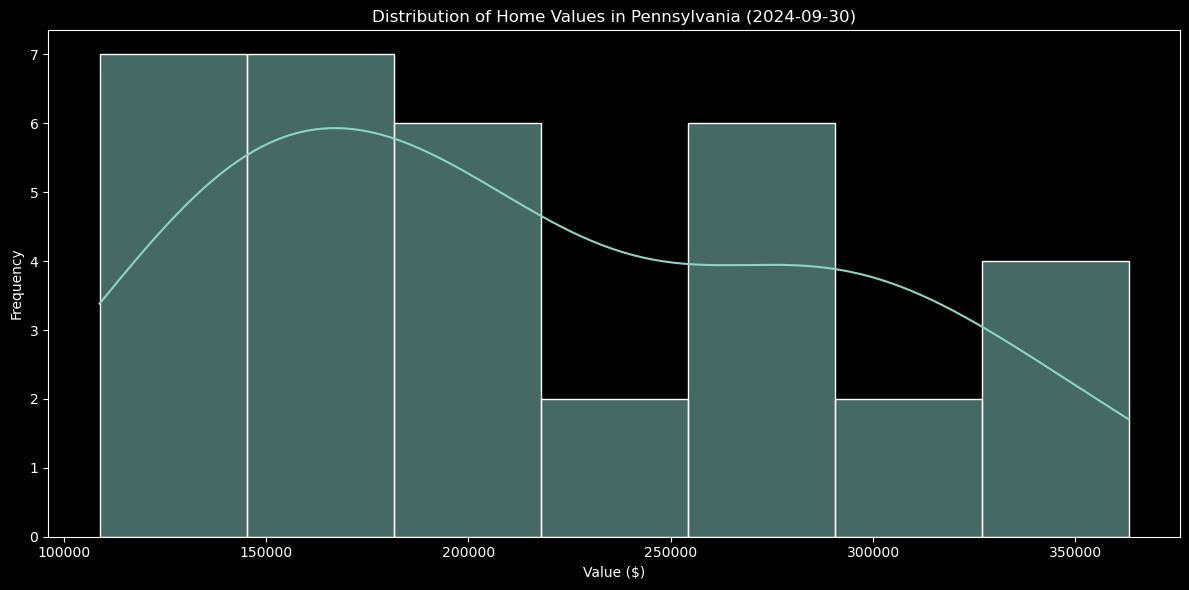

Results saved as 'home_value_distribution_pennsylvania.png'


In [141]:
## 4.2 Distribution (latest date)

# Find the most recent date in the data to focus on current home values
latest_date = pa_data['Date'].max()

# Filter the data for the latest date to get the most recent values
latest_values = pa_data[pa_data['Date'] == latest_date]

# Plot a distribution of home values for the latest date
plt.figure(figsize=(12, 6))
sns.histplot(latest_values['Value'], kde=True)

# Augment or and incorporate the other graph properties
plt.title(f'Distribution of Home Values in Pennsylvania ({latest_date.date()})')
plt.xlabel('Value ($)')
plt.ylabel('Frequency')
plt.tight_layout()

# Save figure to file
plt.savefig(os.path.join(output_dir, 'home_value_distribution_pennsylvania.png'))

# Display the plot
plt.show()

print("Results saved as 'home_value_distribution_pennsylvania.png'")

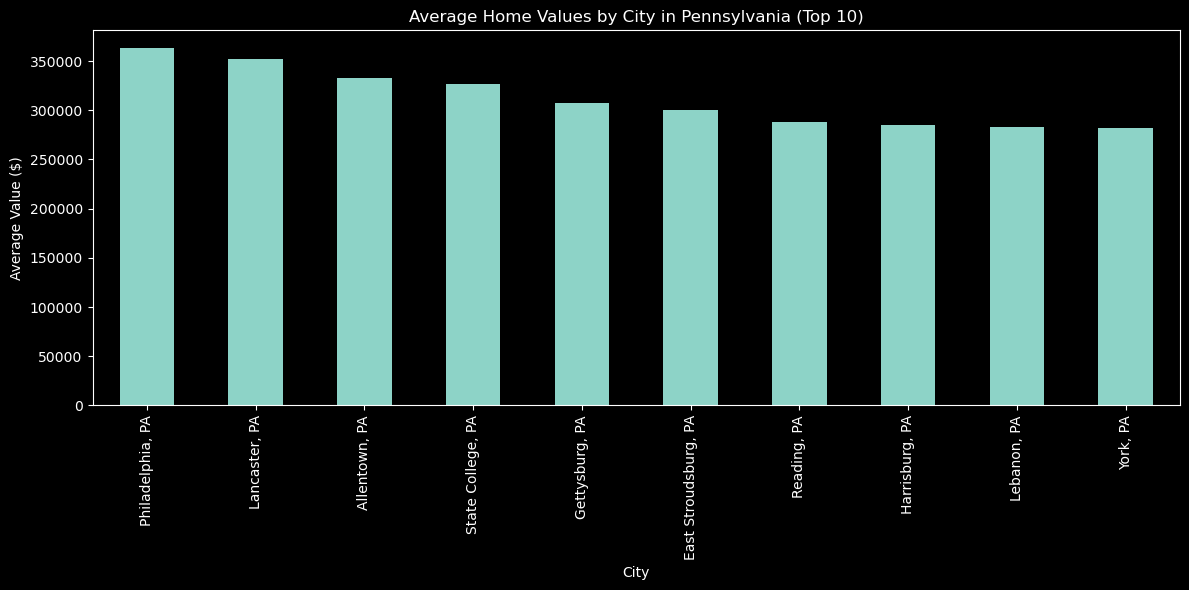

Results saved as 'average_home_values_pennsylvania_top_10.png'


In [142]:
## 4.3 Average Home Values by City (latest date)

# Calculate the average home value for each region, sort by value in descending order
avg_values = latest_values.groupby('RegionName')['Value'].mean().sort_values(ascending=False)

# Plot the top 10 regions with the highest average home values
plt.figure(figsize=(12, 6))
avg_values.head(10).plot(kind='bar')

# Augment or and incorporate the other graph properties
plt.title('Average Home Values by City in Pennsylvania (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Value ($)')
plt.xticks(rotation=90)
plt.tight_layout()

# Save figure to file
plt.savefig(os.path.join(output_dir, 'average_home_values_pennsylvania_top_10.png'))

# Display the plot
plt.show()

print("Results saved as 'average_home_values_pennsylvania_top_10.png'")

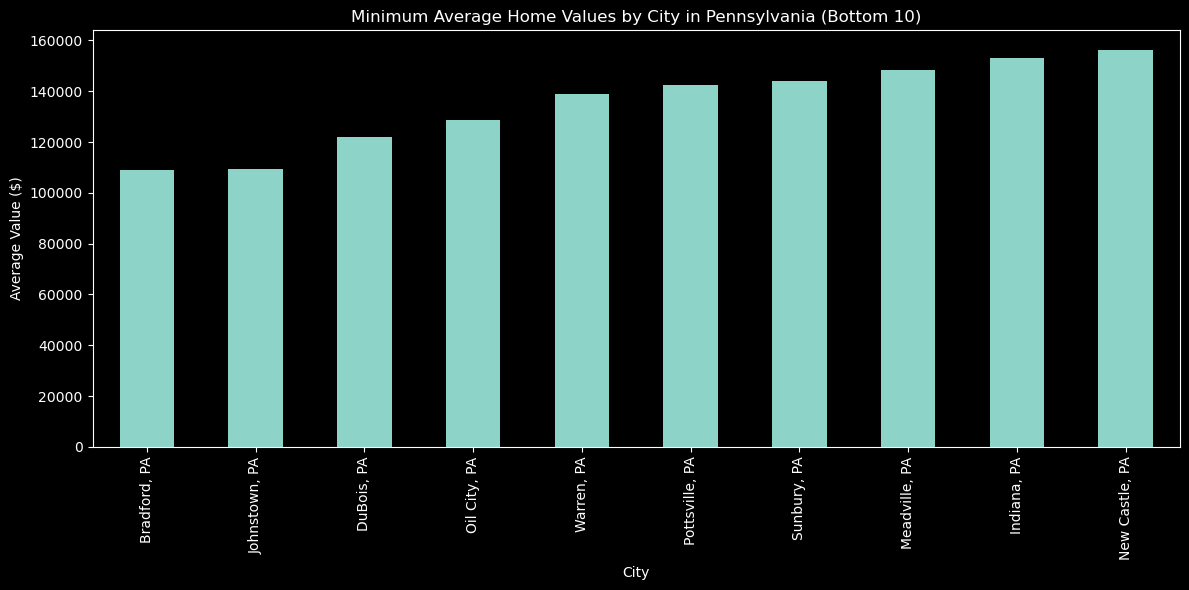

Results saved as 'minimum_home_values_pennsylvania_bottom_10.png'


In [143]:
## 4.4 Minimum Average Home Values by City (latest date) 

# Sort regions by value in ascending order for the lowest values
min_avg_values = avg_values.sort_values(ascending=True) 

# Plot the bottom 10 regions with the lowest average home values
plt.figure(figsize=(12, 6)) 
min_avg_values.head(10).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Minimum Average Home Values by City in Pennsylvania (Bottom 10)') 
plt.xlabel('City') 
plt.ylabel('Average Value ($)') 
plt.xticks(rotation=90) 
plt.tight_layout()

# Save figure to file
plt.savefig(os.path.join(output_dir, 'minimum_home_values_pennsylvania_bottom_10.png'))

# Display the plot
plt.show()

print("Results saved as 'minimum_home_values_pennsylvania_bottom_10.png'")

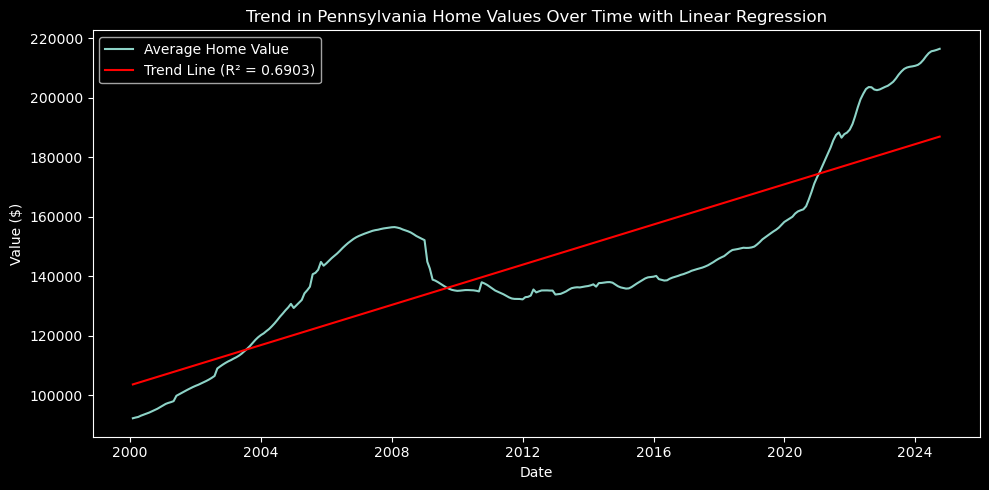

R-squared value for Pennsylvania: 0.6903


In [144]:
## 4.5 Trends Over Time Overall Pennsylvania with Linear Regression and R-squared Value

# Function to calculate and plot trend with linear regression
def calculate_trend_with_r2(data, region_name):
    avg_values_over_time = data.groupby('Date')['Value'].mean().reset_index()
    X = avg_values_over_time['Date'].map(datetime.toordinal).values.reshape(-1, 1)
    y = avg_values_over_time['Value'].values

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(avg_values_over_time['Date'], y, label='Average Home Value')
    plt.plot(avg_values_over_time['Date'], y_pred, color='red', label=f'Trend Line (R² = {r_squared:.4f})')
    plt.title(f"Trend in {region_name} Home Values Over Time with Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Value ($)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{region_name.lower().replace(" ", "_")}_home_value_trend_with_regression.png')
    plt.show()

    print(f"R-squared value for {region_name}: {r_squared:.4f}")

# Pennsylvania
calculate_trend_with_r2(pa_data, 'Pennsylvania')

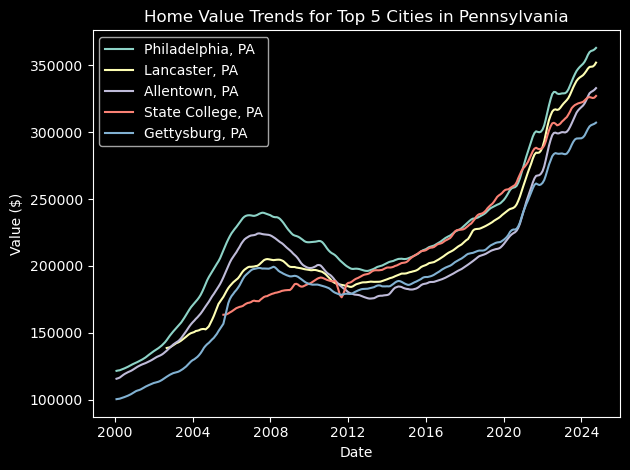

Results saved as 'home_value_trends_pennsylvania_top_5.png'


In [145]:
## 4.6 Trends Over Time (for top 5 regions) 

# Identify the top 5 regions by average value
top_5_cities = avg_values.head().index.tolist()

# Plot home value trends over time for each of these top 5 regions
for city in top_5_cities:
    # Filter data for each region and plot its value trend
    city_data = pa_data[pa_data['RegionName'] == city]
    plt.plot(city_data['Date'], city_data['Value'], label=city)

# Augment or and incorporate the other graph properties
plt.title('Home Value Trends for Top 5 Cities in Pennsylvania')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.tight_layout()

# Save figure to file
plt.savefig(os.path.join(output_dir, 'home_value_trends_pennsylvania_top_5.png'))

# Display the plot
plt.show()

print("Results saved as 'home_value_trends_pennsylvania_top_5.png'")

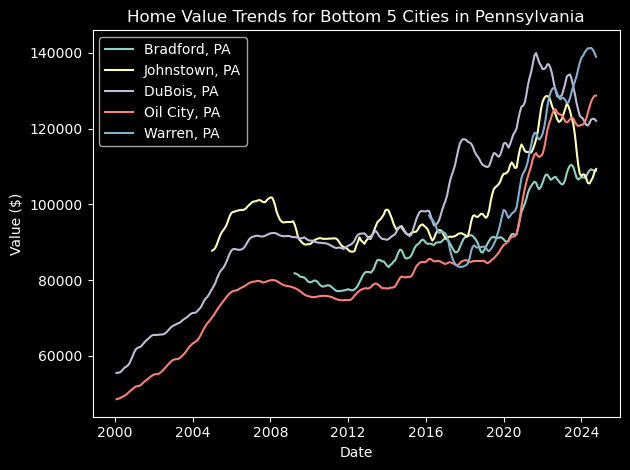

Results saved as 'home_value_trends_pennsylvania_bottom_5.png'


In [146]:
## 4.7 Trends Over Time (for bottom 5 regions) 

# Identify the bottom 5 regions by average value
bottom_5_cities = min_avg_values.head().index.tolist() 

# Plot home value trends over time for each of these bottom 5 regions
for city in bottom_5_cities: 
    city_data = pa_data[pa_data['RegionName'] == city] 
    plt.plot(city_data['Date'], city_data['Value'], label=city) 

# Augment or and incorporate the other graph properties
plt.title('Home Value Trends for Bottom 5 Cities in Pennsylvania') 
plt.xlabel('Date') 
plt.ylabel('Value ($)') 
plt.legend() 
plt.tight_layout() 

# Save figure to file
plt.savefig(os.path.join(output_dir, 'home_value_trends_pennsylvania_bottom_5.png'))

# Display the plot
plt.show()

print("Results saved as 'home_value_trends_pennsylvania_bottom_5.png'")

In [147]:
# Step 5: Conclusions (PA Data)

# (a) Variation in Home Values Across Regions
print("\nConclusions for Pennsylvania Analysis:")
print("a. Is there a significant variation in home values across regions in Pennsylvania?")
print(f"   i. The overall average home value in Pennsylvania is ${pa_avg_value:,.2f}.")
print(f"   ii. The city with the highest average home value is {avg_values.index[0]} with an average value of ${avg_values.iloc[0]:,.2f}.")
print(f"   iii. The city with the lowest average home value is {min_avg_values.index[0]} with an average value of ${min_avg_values.iloc[0]:,.2f}.")
print("   Conclusion: There is significant variation in home values across regions in Pennsylvania, with notable differences between the highest and lowest values.")

# (b) Trends in Home Values Over Time
print("\nb. Does the data show clear trends in home values over time in Pennsylvania, with increasing values over a longer period?")
print("   Conclusion: The data shows a general upward trend in home values over time, indicating increasing values across most regions, though the rate of increase varies by region.")


Conclusions for Pennsylvania Analysis:
a. Is there a significant variation in home values across regions in Pennsylvania?
   i. The overall average home value in Pennsylvania is $150,118.21.
   ii. The city with the highest average home value is Philadelphia, PA with an average value of $363,118.50.
   iii. The city with the lowest average home value is Bradford, PA with an average value of $108,862.94.
   Conclusion: There is significant variation in home values across regions in Pennsylvania, with notable differences between the highest and lowest values.

b. Does the data show clear trends in home values over time in Pennsylvania, with increasing values over a longer period?
   Conclusion: The data shows a general upward trend in home values over time, indicating increasing values across most regions, though the rate of increase varies by region.


In [148]:
# Step 6: Save processed Pennsylvania data
pa_data.to_csv(os.path.join(output_dir,'processed_pa_zillow_data.csv'))
print("Processed Pennsylvania data saved as 'processed_pa_zillow_data.csv'")

print("\nPennsylvania analysis complete!")

Processed Pennsylvania data saved as 'processed_pa_zillow_data.csv'

Pennsylvania analysis complete!
